<a href="https://colab.research.google.com/github/Allen-yang3/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

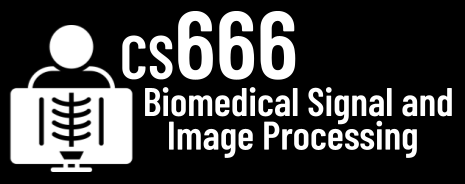

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.7 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

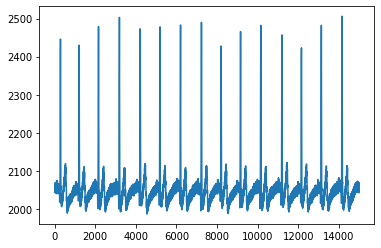

In [5]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!
plt.plot(signal)

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [6]:
#!apt-get install -y xvfb # Install X Virtual Frame Buffer
#import os
#os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
#os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.


In [7]:
### TODO
from biosppy.signals import ecg
import matplotlib.pyplot as plt
import numpy as np
out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

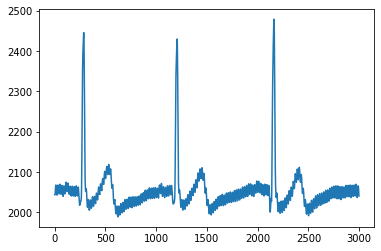

In [8]:
### TODO plot unfiltered signal
three_seconds = signal[0:3*SAMPLING_RATE]
plt.plot(three_seconds)

#PQRST waves are visible but not clear due to noise. 

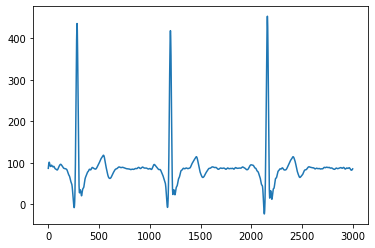

In [18]:
### TODO plot filtered signal
filtered_signal = out[1]
fil_three_seconds = filtered_signal[0:3*SAMPLING_RATE]
plt.plot(fil_three_seconds)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

[  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]


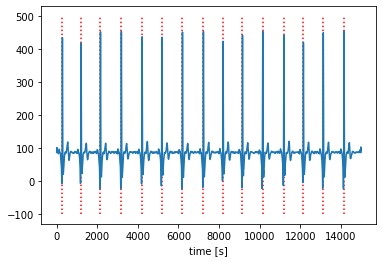

In [52]:
from scipy.signal import peak_widths
### TODO
rpeak_loc = out[2]
print(rpeak_loc)

plt.plot(filtered_signal)
plt.xlabel('time [s]')
r_peaks = [283, 1204, 2159, 3188, 4211, 5188, 6200, 7232, 8200, 9157, 10156, 11198, 12159, 13139, 14162]

plt.vlines(x = r_peaks, ymin = -100, ymax = 500, color = "R", ls = ":")

#Instead on using plt.axvline which only plots one line, I used vlines which is able to plot multiple lines.

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [53]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.3 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


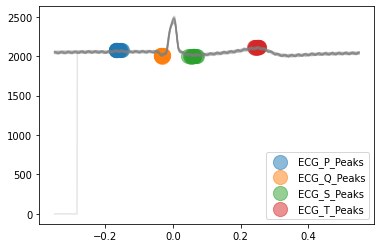

In [66]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, 
                                 r_peaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Does the detection work well?

#I think the detection works fairly well, it detects where the waves are in ecg. It is able to find PQST waves clearly and visualize them. 

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

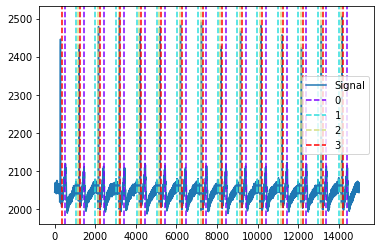

In [72]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, r_peaks, sampling_rate=1000, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:16], 
                       waves_peak['ECG_P_Peaks'][:16],
                       waves_peak['ECG_Q_Peaks'][:16],
                       waves_peak['ECG_S_Peaks'][:16]], signal[:16000])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
# TODO Which one works the best?

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#